In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  

             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  

             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  

             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  

             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [3]:
#rescale value 0 -1
for i in range(len(tableau20)):
    r,g,b = tableau20[i]
    tableau20[i] =(r/255. , g/255., b/255.)

In [4]:
#define dataset
midwest =pd.read_csv("http://goo.gl/G1K41K")
miswest =midwest[midwest.poptotal<50000] #only 50k data
#poptotal is population
#  midwest.head(5) to see top 5 data

In [5]:
 midwest.head().loc[:,['area']]

,area
0,0.052
1,0.014
2,0.022
3,0.017
4,0.018


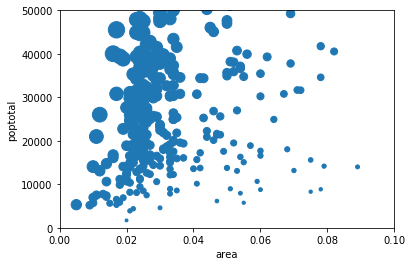

In [6]:
midwest.plot(kind='scatter', x='area', y='poptotal',
             ylim=((0,50000)), xlim=((0., 0.1)),
             s=midwest['popdensity']*0.1)
plt.show()

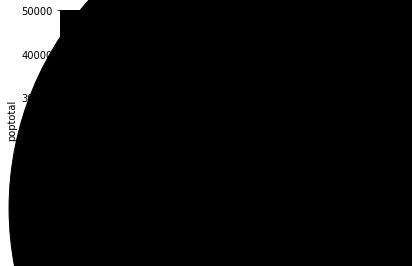

In [9]:
#for clarity in data we'll group it
fig, ax =plt.subplots()
groups=midwest.groupby('state')
colors = tableau20[::2]

#ploting each 
#enumerate - allows the data to get store from list to tuple
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter', x='area', y='poptotal',
              ylim=((0, 50000)), xlim=((0., 0.1)),
              s=10+group['popdensity']*0.1,
              label=name, ax=ax, color=colors[i])
#legend for states
lgd=ax.legend(numpoints=1, loc=1, borderpad=1,
            frameon=True, framealpha=0.9, title="State")
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])

#s=sizes of particles
#legend for pop density
pws =(pd.cut(midwest['popdensity'], bins=4,
            retbins=True)[1]).round(0)
for pw in pws:
    plt.scatter([], [], s=(pw**2)/2e4, c="k",
                label=str(pw))
      
h, l =plt.gca().get_legend_handles_labels()
plt.legend(h[5:], l[5:], labelspacing=1.2,
          title="popdensity", borderpad=1, frameon=True,
          framealpha=0.9, loc=4, numpoints=1)
plt.gca().add_artist(lgd)
plt.show()

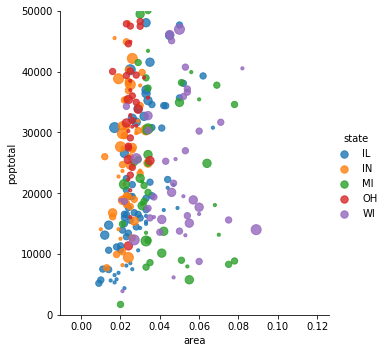

In [12]:
sizes=[10,40,70,100]
marker_size = pd.cut(midwest['popdensity'],
                    range(0, 2500, 500), labels=sizes)
sn.lmplot('area', 'poptotal', data=midwest, hue='state', fit_reg=False,
          scatter_kws={'s':marker_size})
plt.ylim((0, 50000))
plt.show()            

In [ ]:
#we can use altair for better visulization but its out of sylebus